Found 30 images belonging to 6 classes.
Epoch 1/15
5/5 [==============================] - 6s 1s/step - loss: 0.3923 - acc: 0.8433
Epoch 2/15
5/5 [==============================] - 6s 1s/step - loss: 0.2470 - acc: 0.9011
Epoch 3/15
5/5 [==============================] - 6s 1s/step - loss: 0.1016 - acc: 0.9733
Epoch 4/15
5/5 [==============================] - 5s 1s/step - loss: 0.0220 - acc: 1.0000
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 0.0035 - acc: 1.0000
Epoch 6/15
5/5 [==============================] - 6s 1s/step - loss: 0.0014 - acc: 1.0000
Epoch 7/15
5/5 [==============================] - 6s 1s/step - loss: 3.4212e-04 - acc: 1.0000
Epoch 8/15
5/5 [==============================] - 6s 1s/step - loss: 1.2717e-04 - acc: 1.0000
Epoch 9/15
5/5 [==============================] - 6s 1s/step - loss: 9.4720e-05 - acc: 1.0000
Epoch 10/15
5/5 [==============================] - 6s 1s/step - loss: 2.9774e-05 - acc: 1.0000
Epoch 11/15
5/5 [==========================

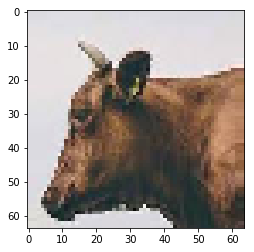

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'softmax'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Part 2 - Fitting the CNN to the images


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32)
# test_set = test_datagen.flow_from_directory('dataset/test_set',
# target_size = (64, 64),
# batch_size = 32,
# class_mode = 'binary')
#fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)

classifier.fit_generator(training_set,
                         steps_per_epoch = 5,
                         epochs = 15,
                         validation_data = None)

#indices
#training_set.class_indices

# Part 3 - Making new predictions
for i in range(1,6):
    path ='test/ram'+str(i)+'.jpg'

    img = image.load_img(path)


    x = image.img_to_array(img)



    test_image = image.load_img(path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    plt.imshow(test_image/255.)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    print(result)
    if result[0][1] == 1:
        print("ram1")
    elif result[0][2]:
        print("ram2")
    elif result[0][3]:
        print("ram3")
    elif result[0][4]:
        print("ram4")
    elif result[0][5]:
        print("ram5")
    print(training_set.class_indices)
